<a href="https://colab.research.google.com/github/ashish613/Malria_detection/blob/main/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

code to mount the drive to google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Installing keras

In [ ]:
! pip install -q keras

All the required liberaries are imported along with the model used to transfer learning



In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Image is resized to dimensions as given below and path where data is placed is also provided




In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/cell_images/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/cell_images/test'

vgg19 deeplearnign model is being downloaded 1)Arguments- inputshape is added to 3 because it's a RGB image 2)weights - imagenet - means insted of random initialization weights are taken from imagenet. 3)include_top=False - means we are deleting or excluding top layers - means first and last layers.

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


All the layers except first and last of vgg19 model are freezed because weights are already trained on similar dataset.

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

Folders is a list containing the paths of all the output classes. In our case there are 2 outputs - parasitized and uninfected.

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/cell_images/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/cell_images/train/Uninfected',
 '/content/drive/MyDrive/Colab Notebooks/cell_images/train/Parasite']

second last layer weights are converted into a vector

In [ ]:
x = Flatten()(vgg.output)

last layer is added after second last layer where length = length of folders list length, it's dense and with softmax activation.

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

This function gives the complete structure of model

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Now the model is compiled where optimizer(algorithm that updates weights in order to reach the global minimum of loss function) is adam, loss is of type categorical_crossentropy(based on probability of occuring of that output) and matrix is of type accuracy.

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

ImageDataGenerator is a class in tensorflow responsible for labeling data to the name as of the folder in which it is present. It is also used for data augmentation and rescaling.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

ImageDataGenerator is applied to create training set

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/cell_images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

ImageDataGenerator is applied to create test set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/cell_images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


Callback function if keras is used to save the best model during the training. If a model is accurate at certain epoch then the model is saved. 

In [ ]:
from keras.callbacks import ModelCheckpoint
model_path='/content/drive/My Drive/colab Notebooks/maleria_model/maleria_dl_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Now the model is trained on the trainig_set. Validation or test_set is also provided so that the error or accuracy on test_set is calculated after every epoch.

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 211s 16s/step - loss: 1.6248 - accuracy: 0.5085 - val_loss: 1.8414 - val_accuracy: 0.3657

Epoch 00001: val_accuracy improved from -inf to 0.36567, saving model to /content/drive/My Drive/colab Notebooks/maleria_model/maleria_dl_model.h5
Epoch 2/50
13/13 [==============================] - 6s 445ms/step - loss: 0.6967 - accuracy: 0.6655 - val_loss: 0.5414 - val_accuracy: 0.7537

Epoch 00002: val_accuracy improved from 0.36567 to 0.75373, saving model to /content/drive/My Drive/colab Notebooks/maleria_model/maleria_dl_model.h5
Epoch 3/50
13/13 [==============================] - 6s 452ms/step - loss: 0.4729 - accuracy: 0.7661 - val_loss: 0.6788 - val_accuracy: 0.6418

Epoch 00003: val_accuracy did not improve from 0.75373
Epoch 4/50
13/13 [==============================] - 6s 454ms/step - loss: 0.3561 - accuracy: 0.8288 - val_loss: 0.4584 - val_accuracy: 0.7537

Epoch 00004: val_accuracy did not improve from 0.75373
Epoch 5/50
13/13 [===

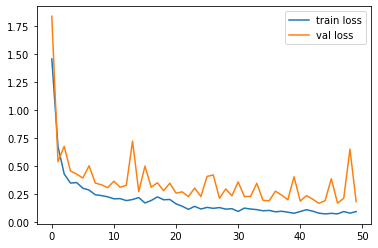

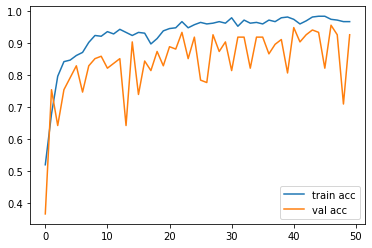

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Model was saved during the training process by using callback functionality.
Here the probability of belonging to a certain class of test_set images are predicted by using the trained model. "model" is an inbuilt class of keras.

If the model would'nt be saved during the training by using callback then we would have saved it by below code 

In [ ]:
#from tensorflow.keras.models import load_model

#model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.99959350e-01, 4.06089748e-05],
       [2.00435355e-01, 7.99564660e-01],
       [1.02833949e-01, 8.97166014e-01],
       [9.99766171e-01, 2.33882820e-04],
       [2.32374743e-01, 7.67625272e-01],
       [9.99950290e-01, 4.97457877e-05],
       [9.99633431e-01, 3.66585678e-04],
       [6.11448288e-02, 9.38855171e-01],
       [9.95926917e-01, 4.07303637e-03],
       [4.08008307e-01, 5.91991663e-01],
       [8.36828828e-01, 1.63171172e-01],
       [9.99919891e-01, 8.00889175e-05],
       [9.99847651e-01, 1.52271095e-04],
       [4.67558146e-01, 5.32441854e-01],
       [9.97947395e-01, 2.05265149e-03],
       [9.97807086e-01, 2.19296385e-03],
       [7.08319902e-01, 2.91680068e-01],
       [9.99996781e-01, 3.17885861e-06],
       [9.99308467e-01, 6.91521389e-04],
       [9.95094776e-01, 4.90520755e-03],
       [9.99996781e-01, 3.19806395e-06],
       [2.32990131e-01, 7.67009854e-01],
       [4.76132005e-01, 5.23867965e-01],
       [8.93621743e-01, 1.06378287e-01],
       [8.403362

Now based on probability the images are labeled either 1 or 0. The output is saved in y_pred as we did in the above code snippet 

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1])


Image is imported from test set.

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/cell_images/test/Uninfected/2.png',target_size=(224,224))

The image which will be given as input is preprocessed

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

Below code snippet is loading the trained model that we saved above. This step is not needed in some frameworks.

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/colab Notebooks/maleria_model/maleria_dl_model.h5')

In [ ]:
model.predict(img_data)

array([[0.00350976, 0.9964902 ]], dtype=float32)

converting the prob to either 0 or 1. In case of muticlass classification we use one-hot encoding.

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
